In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Imports

import os
import numpy as np
from matplotlib import image
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
# Preprocessing

# Get the Van Gogh images.
folder_path = "q1_dataset/van_gogh/"

# A list to hold or images as numpy arrays.
photos = []

# Get a list of all images in the folder.
imgList = os.listdir(folder_path)

for i in imgList:
    img = image.imread(os.path.join(folder_path + i))
    data = np.asarray(img)
    if len(data.shape) < 3:
        data = np.stack((data, data, data), axis=2)
    photos.append(data)

# Convert photos to numpy array.
photos = np.asarray(photos)

# Flatten the photos array from D x 64 x 64 x 3 to D x 4096 x 3 where D
# is the total number of images.
result = photos.flatten().reshape(877, 4096, 3)

# Slice the array for each channel R, G, B.
X1 = result[: ,: ,0]
X2 = result[: ,: ,1]
X3 = result[: ,: ,2]

In [ ]:
# Question 1.1
def PCA(X1, X2, X3):
    # Calculate means
    meanX1 = np.mean(X1, axis = 0)
    meanX2 = np.mean(X2, axis = 0)
    meanX3 = np.mean(X3, axis = 0)

    X1 = X1 - meanX1
    X2 = X2 - meanX2
    X3 = X3 - meanX3

    # SVD based PCA
    PCA1 = np.linalg.svd(X1)
    PCA2 = np.linalg.svd(X2)
    PCA3 = np.linalg.svd(X3)
    
    # Get singulars
    singular1 = PCA1[1]
    singular2 = PCA2[1]
    singular3 = PCA3[1]


    # Calculate the covariance matrix
    cov1 = np.cov(X1.T)
    cov2 = np.cov(X2.T)
    cov3 = np.cov(X3.T)

    # Get the eigenvalues and eigenvectors
    eigen_values1, eigen_vectors1 = np.linalg.eig(cov1)
    eigen_values2, eigen_vectors2 = np.linalg.eig(cov2)
    eigen_values3, eigen_vectors3 = np.linalg.eig(cov3)

    # Sum of eigen values for explained variance
    eigensum1 = np.sum(eigen_values1)
    eigensum2 = np.sum(eigen_values2)
    eigensum3 = np.sum(eigen_values3)

    # Find individual variances explained
    var1 = [eig_value / eigensum1 for eig_value in eigen_values1]
    var2 = [eig_value / eigensum2 for eig_value in eigen_values2]
    var3 = [eig_value / eigensum3 for eig_value in eigen_values3]

    # Find cumulative variances explained
    varcum1 = np.cumsum(var1)
    varcum2 = np.cumsum(var2)
    varcum3 = np.cumsum(var3)

    return var1, var2, var3, varcum1, varcum2, varcum3, singular1, singular2, singular3

var1, var2, var3, varcum1, varcum2, varcum3, singular1, singular2, singular3 = PCA(X1, X2, X3)

print("For the first 10 principle components")
print("Individual Variance Explained for X1 ", var1[:10])
print("Individual Variance Explained for X2 ", var2[:10])
print("Individual Variance Explained for X3 ", var3[:10])

print("Cumulative Variance Explained for X1 ", varcum1[:10])
print("Cumulative Variance Explained for X2 ", varcum2[:10])
print("Cumulative Variance Explained for X3 ", varcum3[:10])

For the first 10 principle components
Individual Variance Explained for X1  [(0.3219683747775757-1.946197872854172e-34j), (0.09064662051598077-5.479303989141609e-35j), (0.04580075668522583-2.7685121340714423e-35j), (0.029378114680405625-1.7758149178151357e-35j), (0.021035417351169892-1.2715250226587746e-35j), (0.01711632070396414-1.0346279186009331e-35j), (0.011536165738760202-6.973250474422677e-36j), (0.01144167369161935-6.916132994709271e-36j), (0.010324686966075098-6.24094954206044e-36j), (0.0084224617385458-5.091114035991069e-36j)]
Individual Variance Explained for X2  [(0.34067776185587595+6.462577865857708e-35j), (0.07980724520977586+1.5139248702883314e-35j), (0.043905605917464036+8.328791273124313e-36j), (0.02641245502912157+5.0103812565956333e-36j), (0.020600265911735336+3.907822506133669e-36j), (0.015452220417679274+2.931250255538986e-36j), (0.010661014329959856+2.02236960995234e-36j), (0.010143849961683066+1.9242647327443645e-36j), (0.00958260892557488+1.817798614216257e-36j)

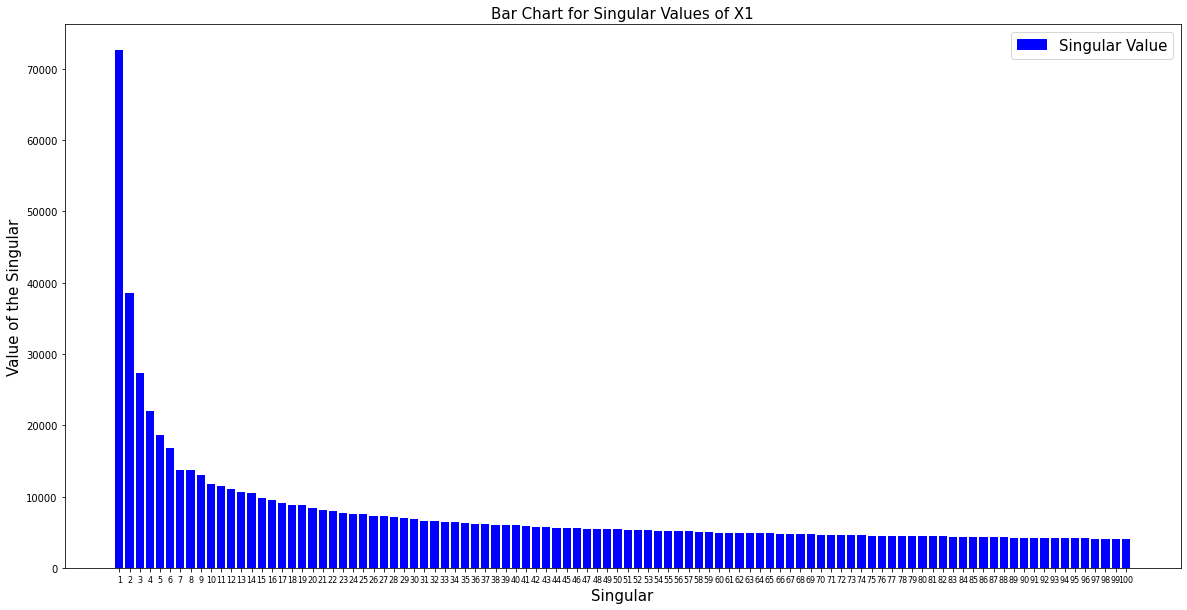

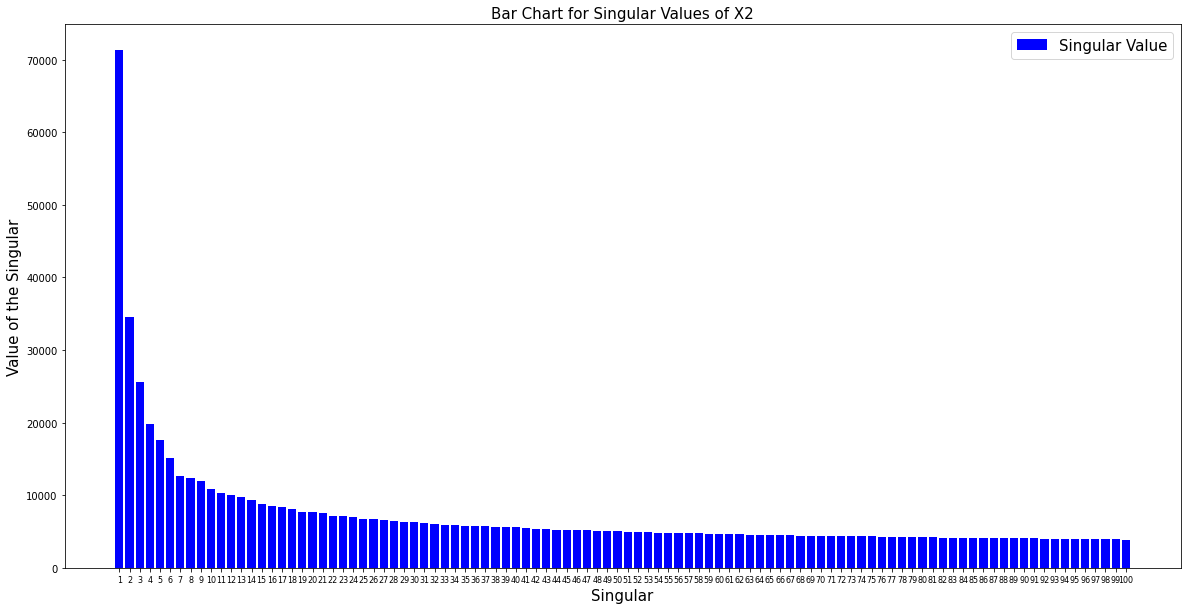

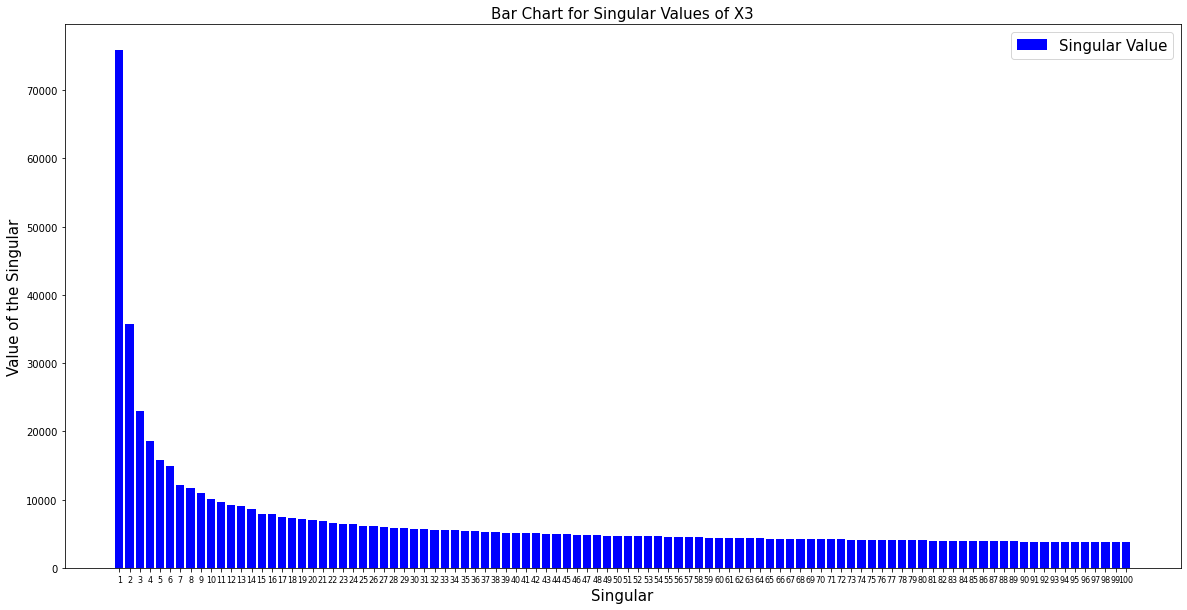

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


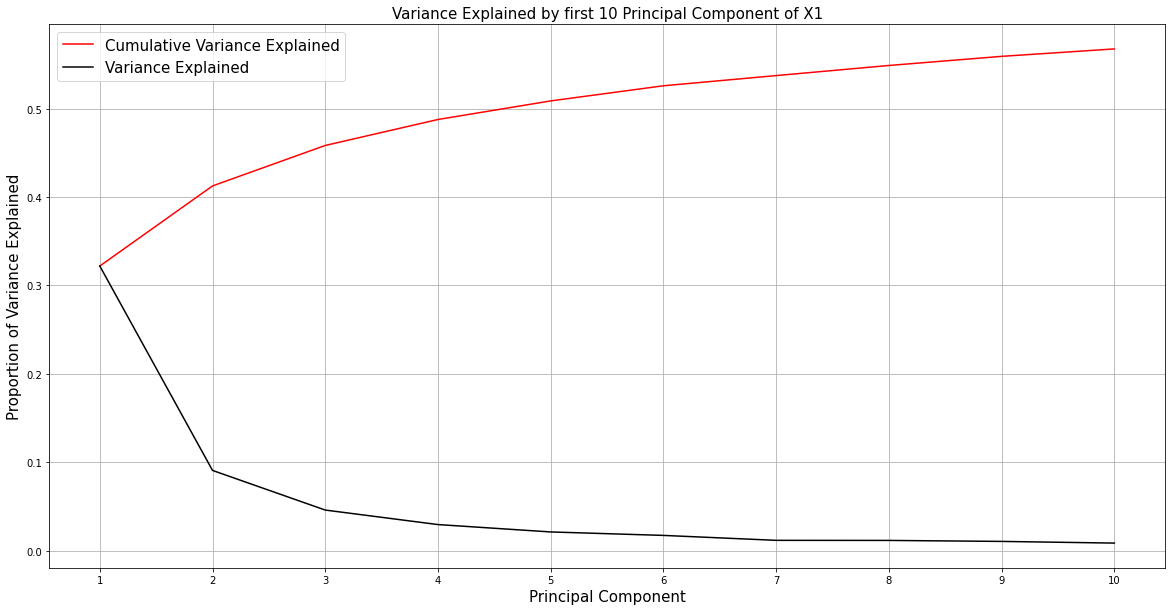

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


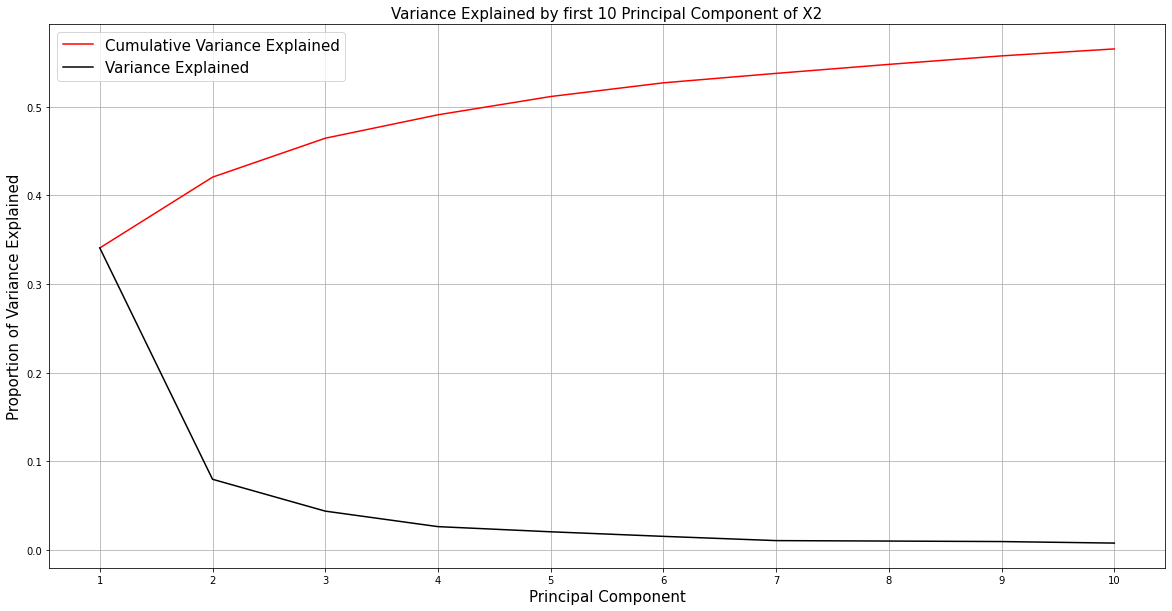

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


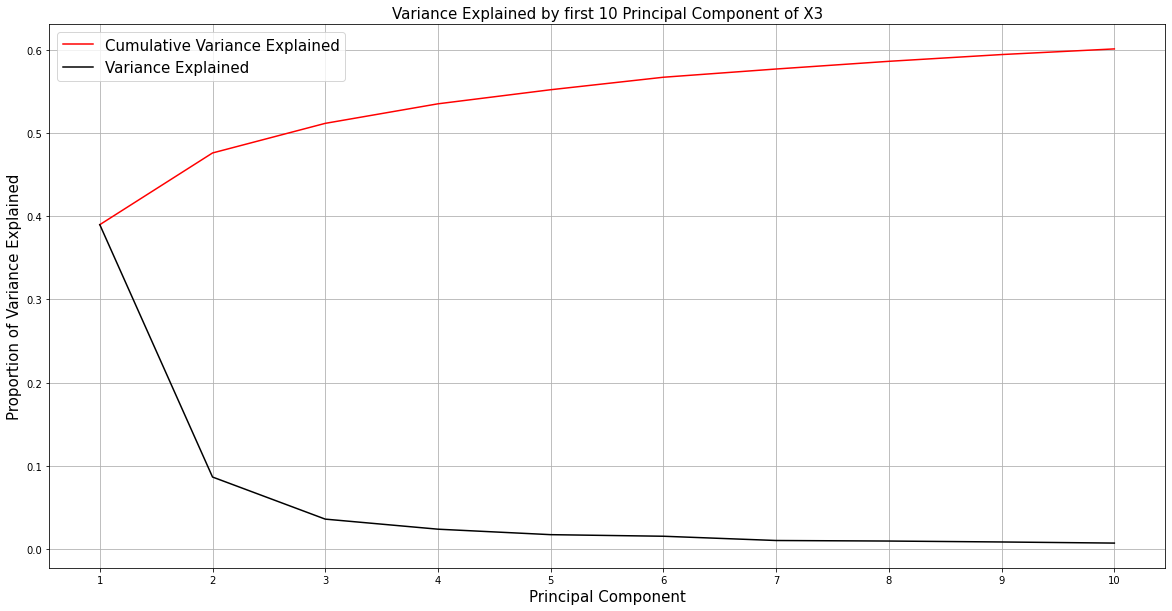

In [ ]:
# Function to plot a bar chart per Xi for the first 100 singular values.
def plotBarChart(singular, k, Xi):
    plt.figure(figsize=(20, 10))
    plt.bar(range(1, k + 1), singular[0:k], align="center", label="Singular Value", color = "blue")
    plt.title("Bar Chart for Singular Values of X{}".format(Xi), fontsize=15)
    plt.xlabel("Singular", fontsize=15)
    plt.xticks(range(1, k + 1), fontsize=8)
    plt.ylabel("Value of the Singular", fontsize=15)
    plt.legend(fontsize=15)
    plt.show()

# Function to plot PVE.
def plotPVE(varSingular, varCumulative, k, Xi):
    plt.figure(figsize=(20, 10))
    plt.plot(range(1, k + 1), varCumulative[0:k], label="Cumulative Variance Explained", color = "red")
    plt.plot(range(1, k + 1), varSingular[0:k], label="Variance Explained", color = "black")
    plt.title("Variance Explained by first {} Principal Component of X{}".format(k, Xi), fontsize=15)
    plt.xticks(range(1, k + 1))
    plt.xlabel("Principal Component", fontsize=15)
    plt.yscale('linear')
    plt.ylabel("Proportion of Variance Explained", fontsize=15)
    plt.legend(fontsize=15)
    plt.grid(True)
    plt.show()


# Draw the plots.
plotBarChart(singular1, 100, 1)
plotBarChart(singular2, 100, 2)
plotBarChart(singular3, 100, 3)

plotPVE(var1, varcum1, 10, 1)
plotPVE(var2, varcum2, 10, 2)
plotPVE(var3, varcum3, 10, 3)

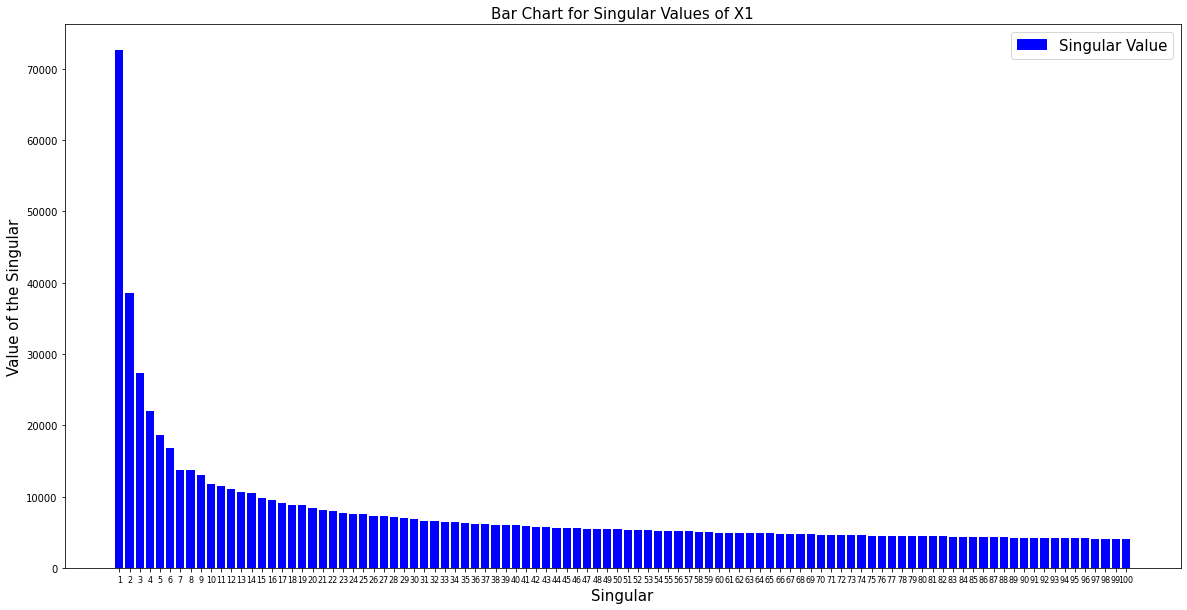

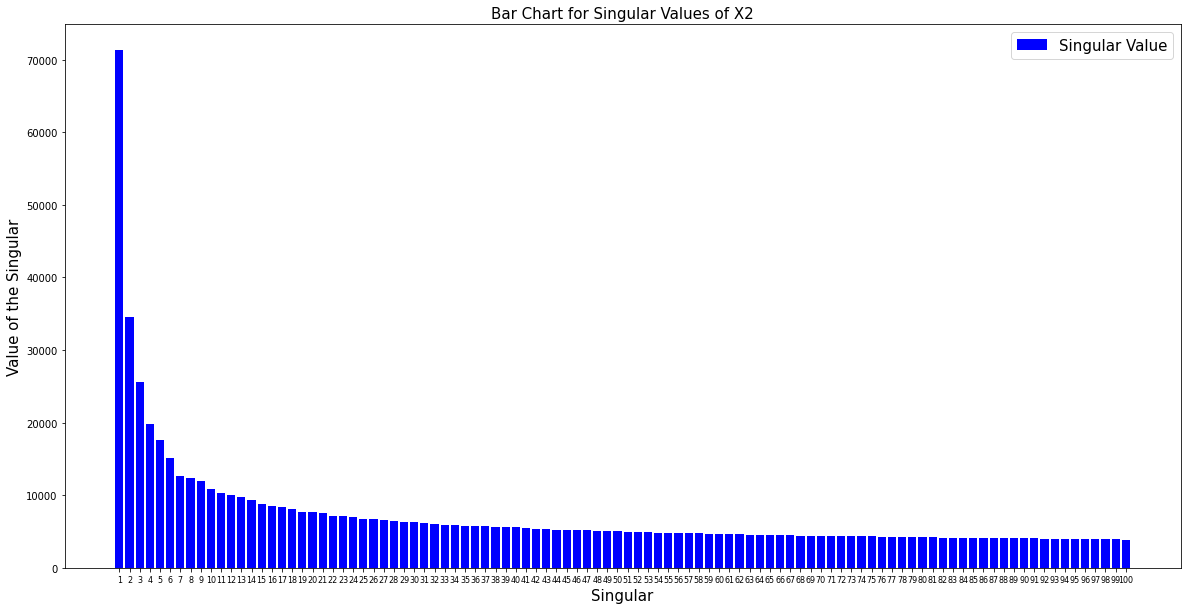

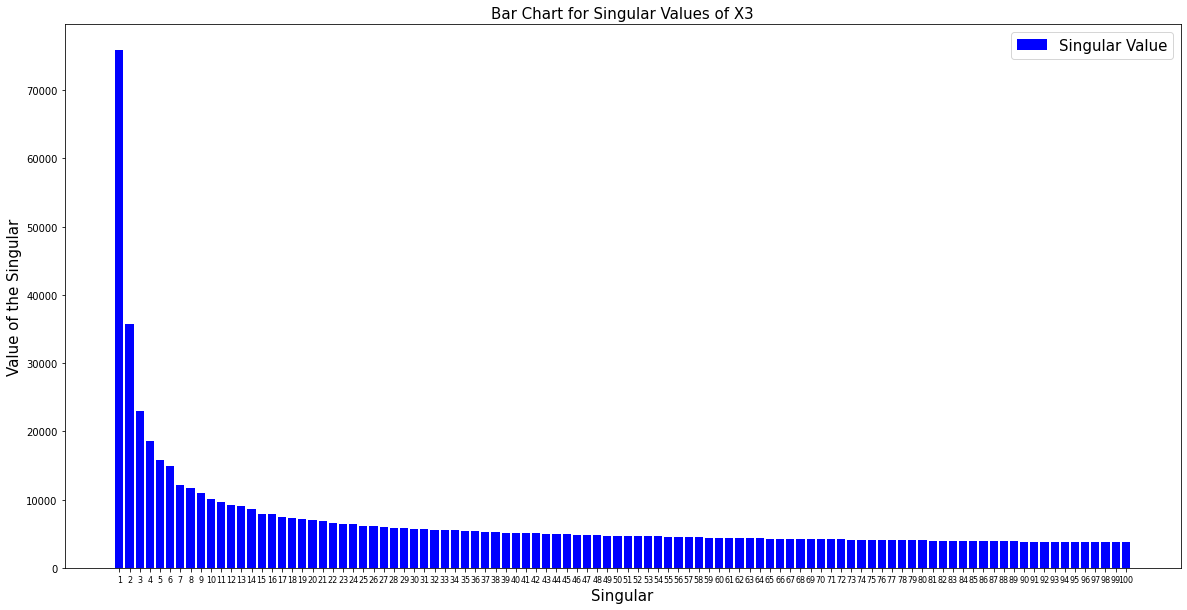

In [ ]:
# Question 1.2

# Add Gaussian Noise to each image.
mean_img = np.mean(photos, axis=0)
variance_img = np.var(photos, axis=0)
sigma = variance_img**(1/2)

# Add Gaussian Noise to each image

for img in photos:
    img = img + 0.01 * np.random.normal(mean_img, sigma, img.shape)

# Flatten the photos array from D x 64 x 64 x 3 to D x 4096 x 3 where D
# is the total number of images.
result = photos.flatten().reshape(877, 4096, 3)

X1 = result[:,:,0]
X2 = result[:,:,1]
X3 = result[:,:,2]

var1, var2, var3, varcum1, varcum2, varcum3, singular1, singular2, singular3 = PCA(X1, X2, X3)

# Plot a bar chart of first 100 singular values.
plotBarChart(singular1, 100, 1)
plotBarChart(singular2, 100, 2)
plotBarChart(singular3, 100, 3)
